## **Import Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, plot_roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## **Import & Getting Know About The Dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Materials/Loan Dataset/train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# check the dataset shape( number of rows & columns)
df.shape

(614, 13)

In [4]:
#checking data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# remove unwanted columns
df.drop(['Loan_ID'],axis=1,inplace=True)

## **Analyse & Visualize The Distribution of Target Variable** 

## **Handle Missing Values**

In [6]:
#checking for null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

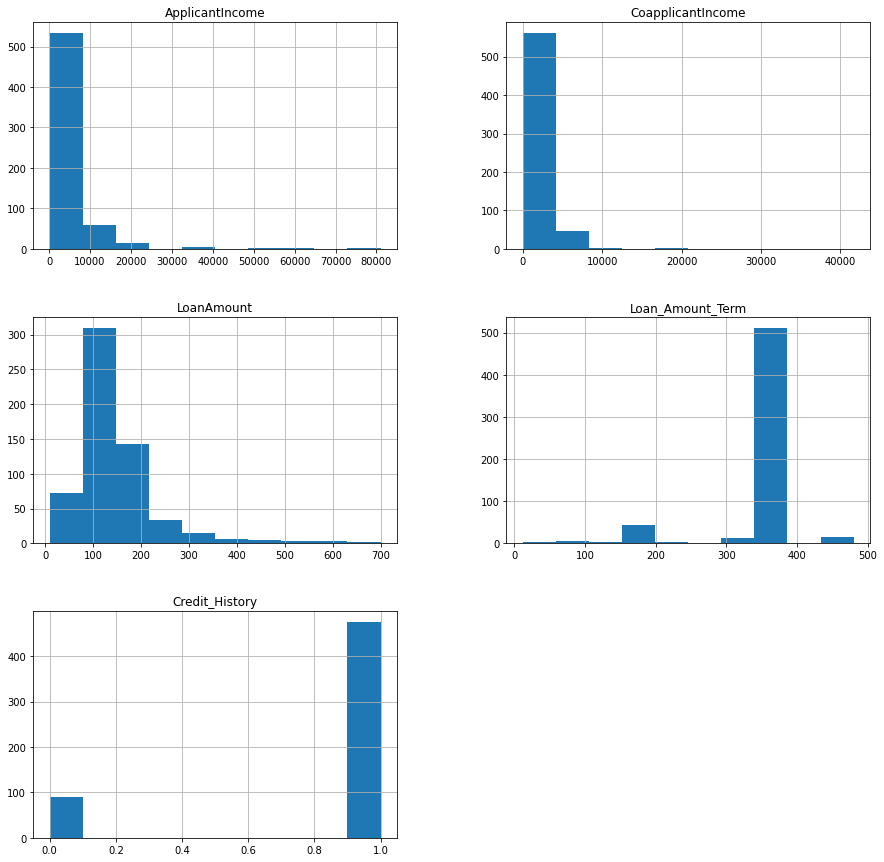

In [7]:
df.hist(figsize=(15,15))
plt.show()

In [8]:
# fill missing values of numerical variable by using mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# loan term shows discrete data but it higher number of categories. therefore in here we handle it as a continues varible
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# fill missing values of categorical variables by using mode
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
#check null values after handled it 
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

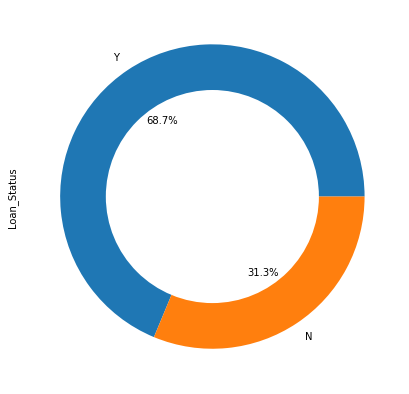

In [11]:
# visualiza the distribution of dependent variable (Loan Status)
plt.figure(figsize=(12,7))

df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')

fig=plt.gcf()
fig.gca().add_artist(centre)

In [12]:
# display first 5 rows of balanced dataset
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
167,Male,Yes,0,Graduate,No,2439,3333.0,129.0,360.0,1.0,Rural,Y
295,Male,Yes,3+,Graduate,No,4416,1250.0,110.0,360.0,1.0,Urban,Y
333,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
476,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


## **Numeric Variable Distribution**

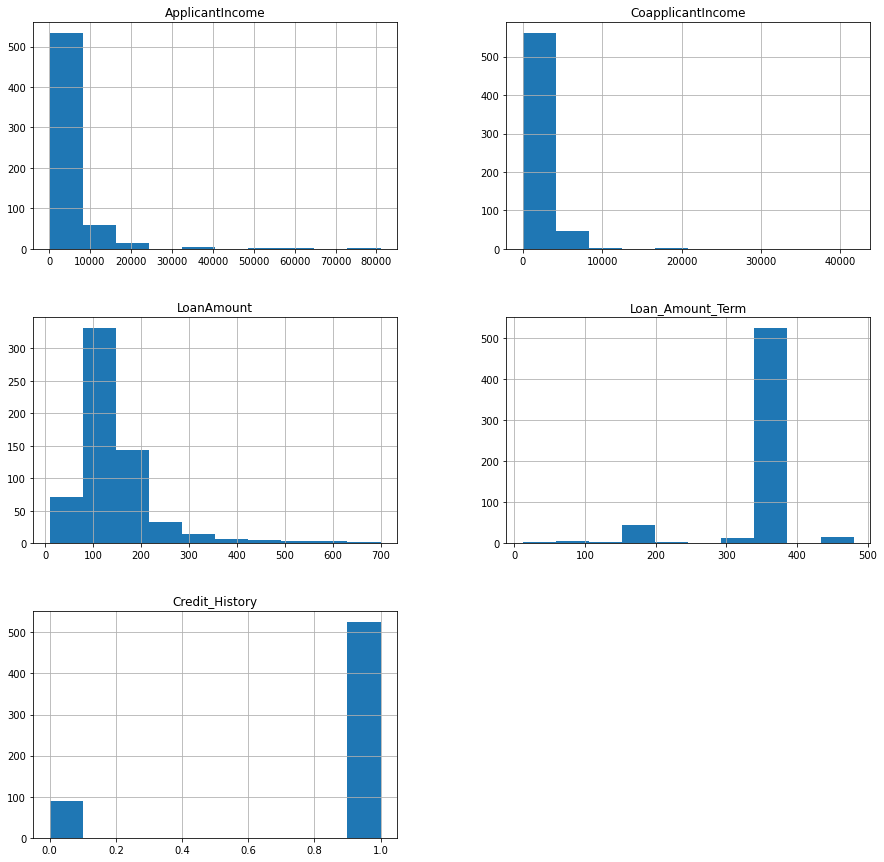

In [13]:
df.hist(figsize=(15,15))
plt.show()

### *Credit history seems to like a categorical variable so we consider as categorical varible for further studies & analysis*

## **Identify outliers In More Accurate Way For Numeric Values**

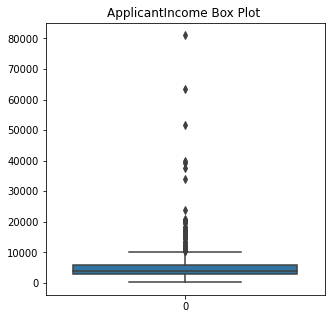

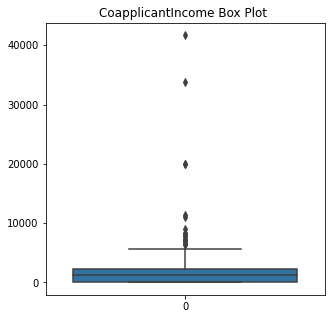

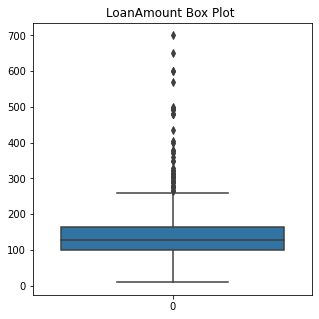

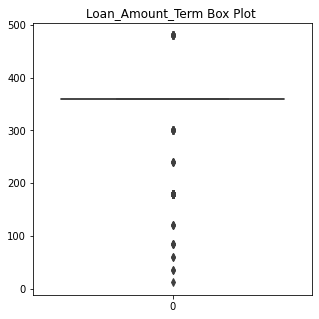

In [14]:
def outliers_check(column):

  title = str(column) + " Box Plot "
  plt.subplots(figsize=(5,5))
  sns.boxplot(data=df[str(i)]).set_title(title)
  plt.show()

for i in df[['ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term']].columns:
  
    outliers_check(i)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


## **Categorical variable Analysis**

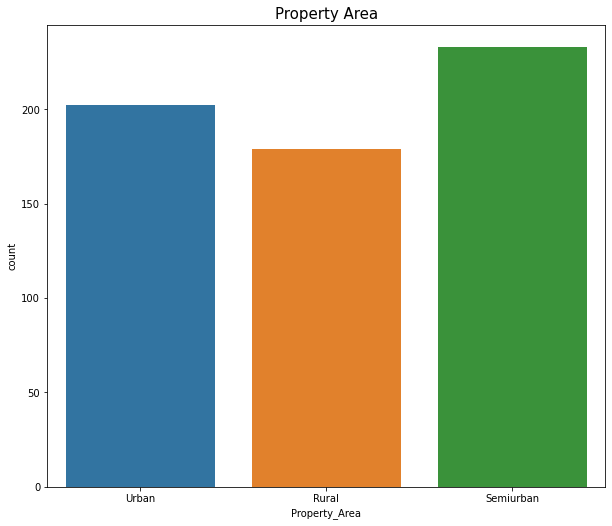

In [16]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['Property_Area'])
plt.title("Property Area",size=15)
plt.show()

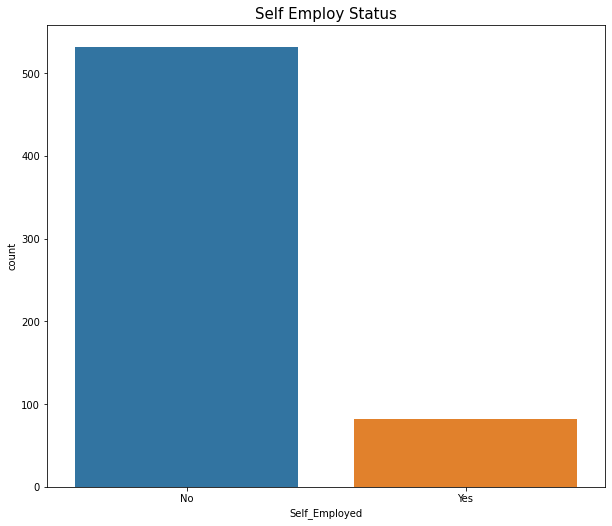

In [17]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['Self_Employed'])
plt.title("Self Employ Status",size=15)
plt.show()

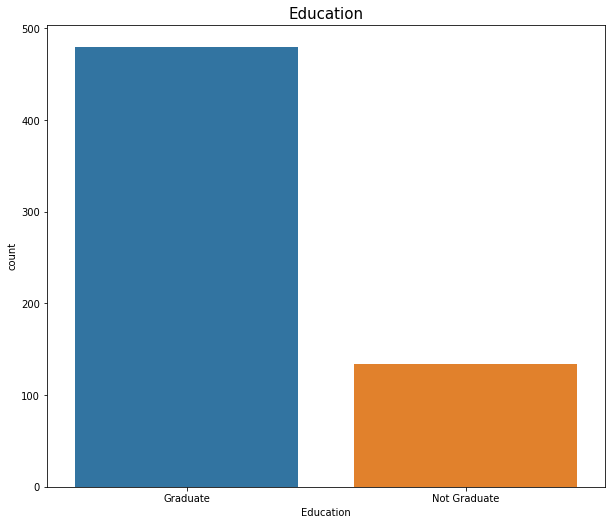

In [18]:
	plt.figure(figsize=(10,8.5))
sns.countplot(df['Education'])
plt.title("Education",size=15)
plt.show()

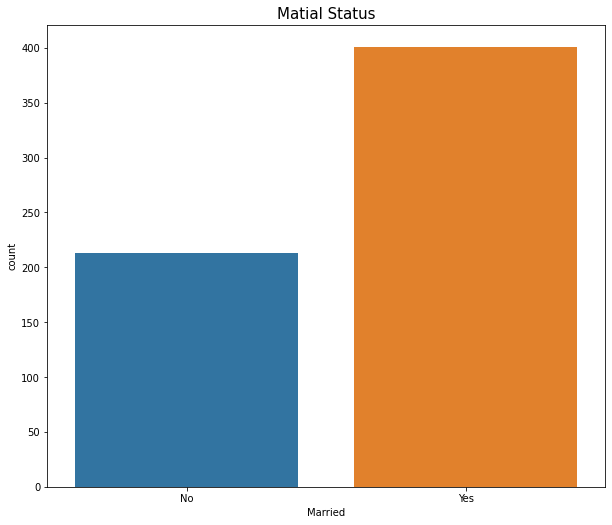

In [19]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['Married'])
plt.title("Matial Status",size=15)
plt.show()

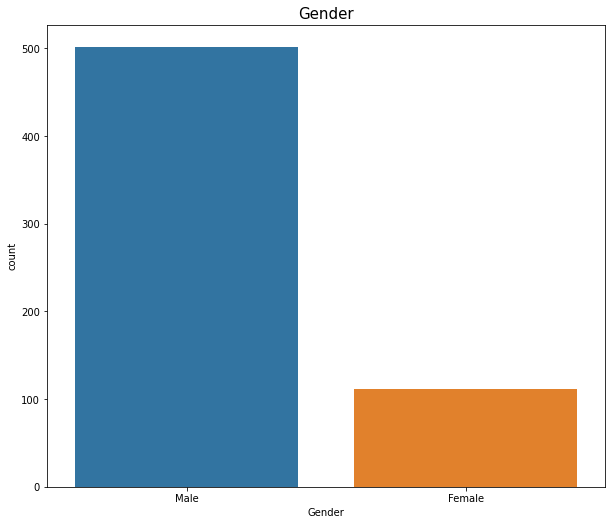

In [20]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['Gender'])
plt.title("Gender",size=15)
plt.show()

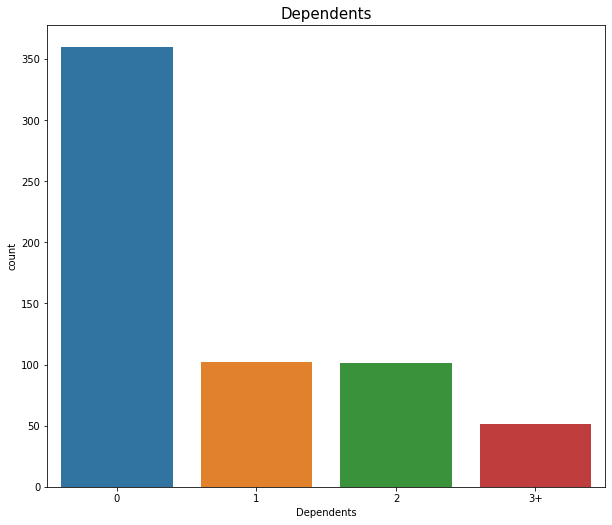

In [21]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['Dependents'])
plt.title("Dependents",size=15)
plt.show()

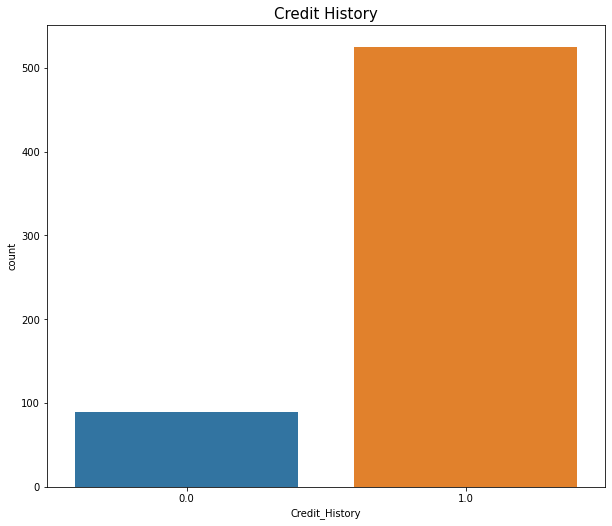

In [22]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['Credit_History'])
plt.title("Credit History",size=15)
plt.show()

In [23]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

## **Exploratory Data Analysis**

---

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


> ## Loan staus vs **Gender**

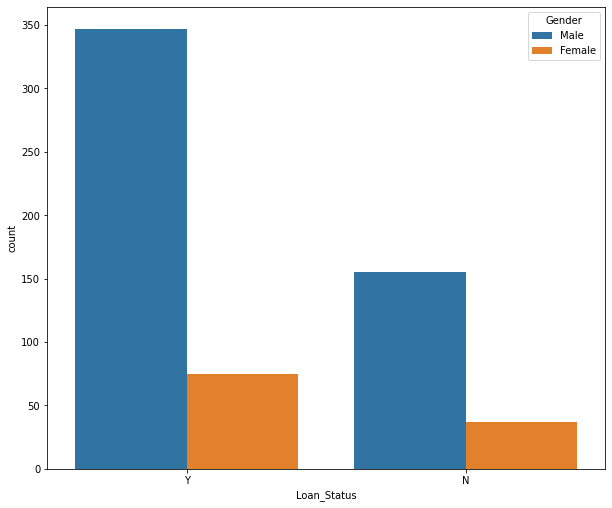

In [25]:
plt.figure(figsize=(10,8.5))
sns.countplot(x='Loan_Status',hue='Gender',data=df)
plt.show()

> ## Loan staus vs **Matial Status**

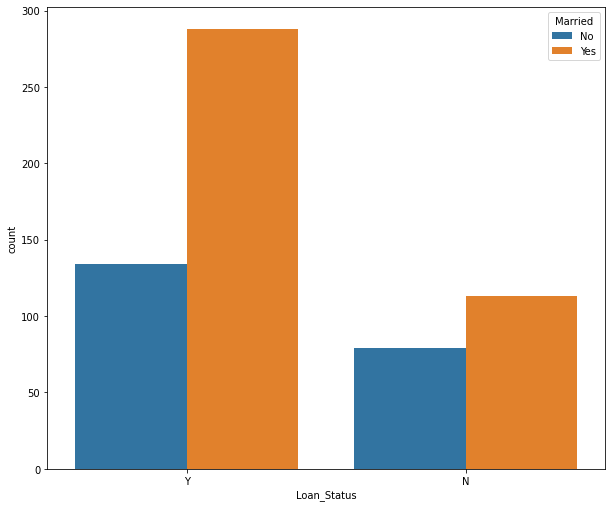

In [26]:
plt.figure(figsize=(10,8.5))
sns.countplot(x='Loan_Status',hue='Married',data=df)
plt.show()

> ## Loan staus vs **Dependents**

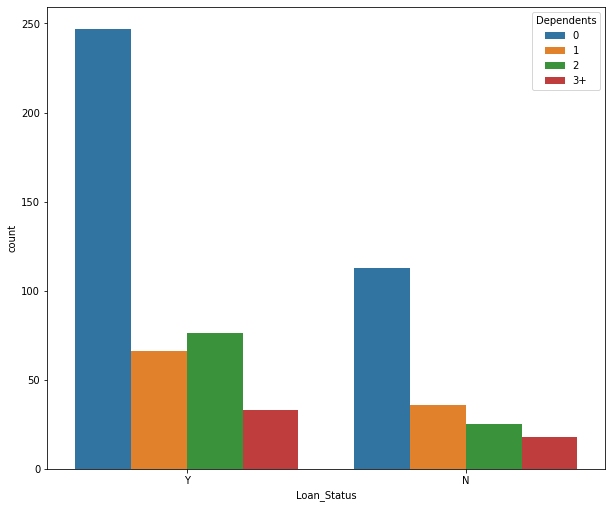

In [27]:
plt.figure(figsize=(10,8.5))
sns.countplot(x='Loan_Status',hue='Dependents',data=df)
plt.show()

> ## Loan staus vs **Employed Status**

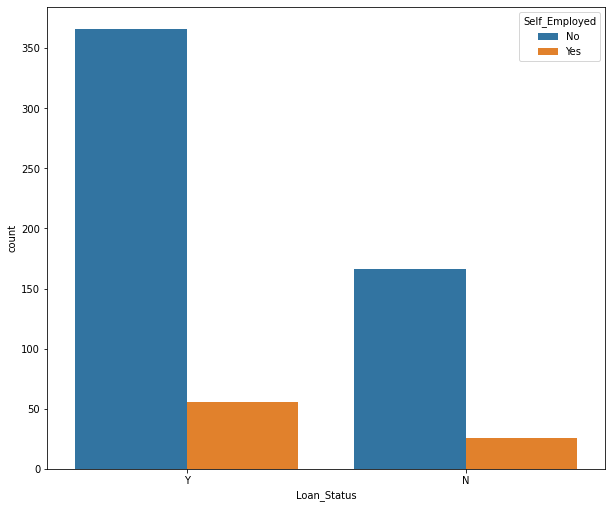

In [28]:
plt.figure(figsize=(10,8.5))
sns.countplot(x='Loan_Status',hue='Self_Employed',data=df)
plt.show()

> ## Loan staus vs **Property Status**

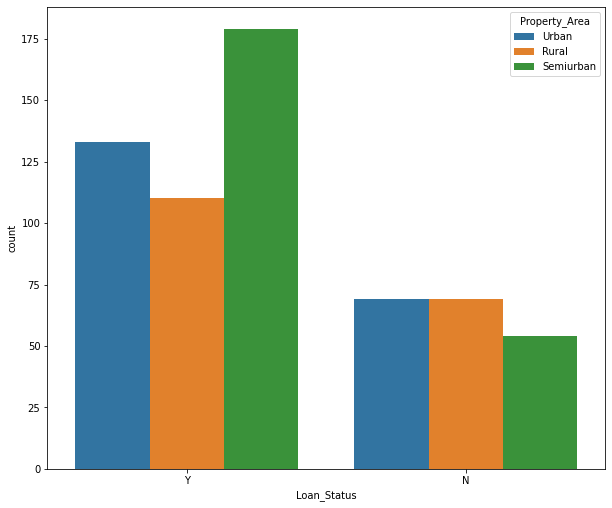

In [29]:
plt.figure(figsize=(10,8.5))
sns.countplot(x='Loan_Status',hue='Property_Area',data=df)
plt.show()

> ## Loan Status vs **Education Status**

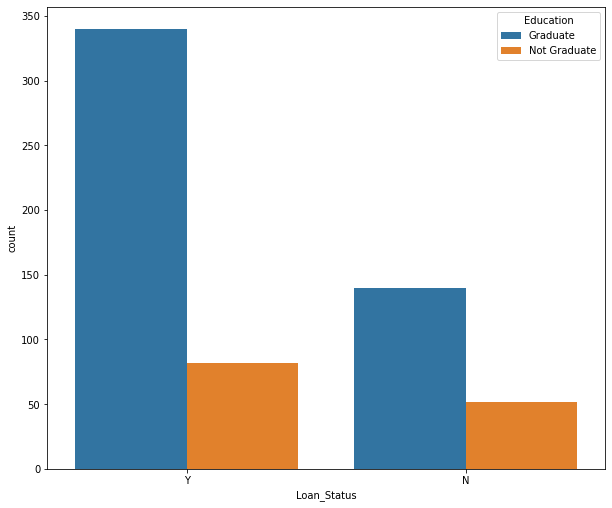

In [30]:
plt.figure(figsize=(10,8.5))
sns.countplot(x='Loan_Status',hue='Education',data=df)
plt.show()

> ## Loan staus vs **Credit History**

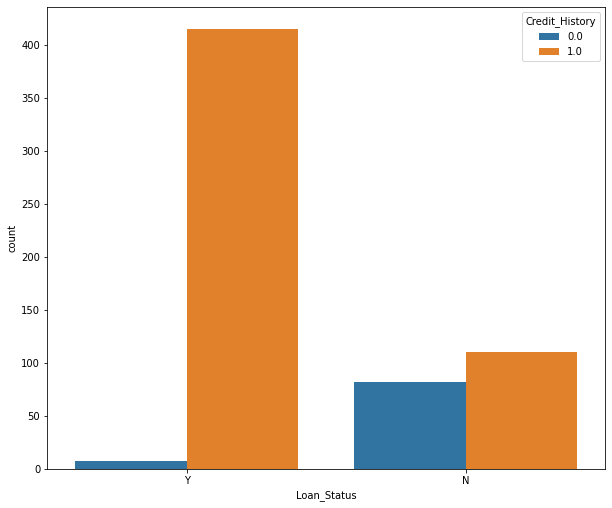

In [31]:
plt.figure(figsize=(10,8.5))
sns.countplot(x='Loan_Status',hue='Credit_History',data=df)
plt.show()

> ## Loan staus vs **Applicant Income**

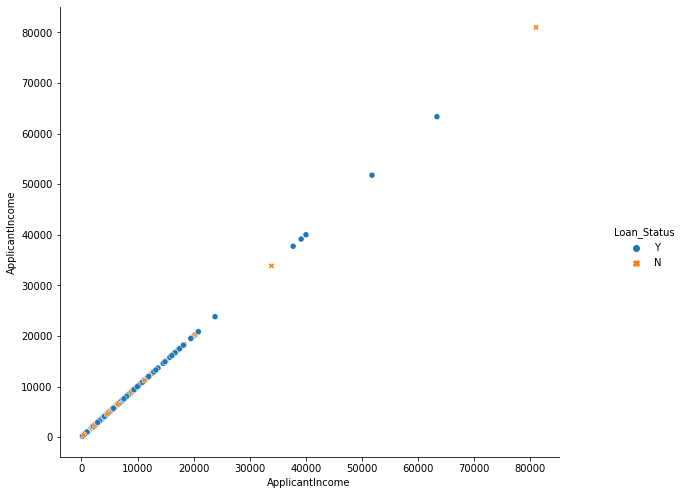

In [32]:
pl=sns.relplot(x='ApplicantIncome',y='ApplicantIncome',data=df,hue='Loan_Status',style='Loan_Status')
pl.fig.set_size_inches(10,7)
plt.show()

> ## Loan staus vs **Co-Applicant Income**

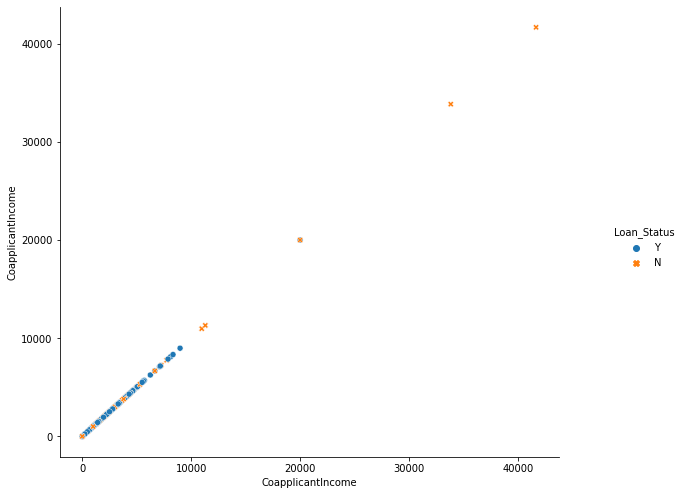

In [33]:
pl=sns.relplot(x='CoapplicantIncome',y='CoapplicantIncome',data=df,hue='Loan_Status',style='Loan_Status')
pl.fig.set_size_inches(10,7)
plt.show()

> ## Loan staus vs **Loan Amount**

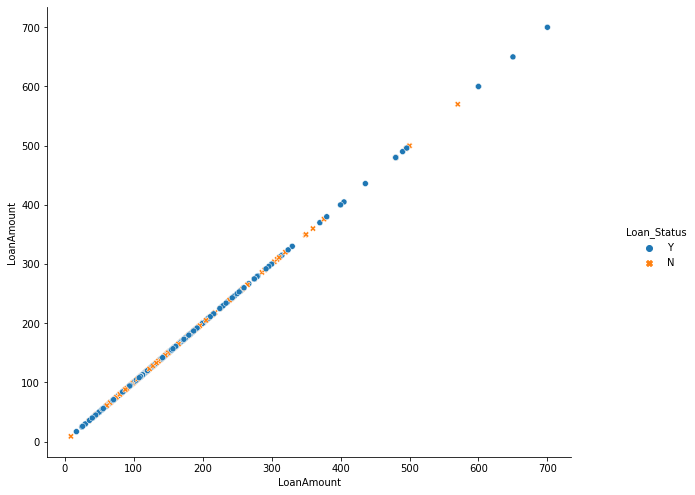

In [34]:
pl=sns.relplot(x='LoanAmount',y='LoanAmount',data=df,hue='Loan_Status',style='Loan_Status')
pl.fig.set_size_inches(10,7)
plt.show()

> ## Loan staus vs **Loan Amount Term**

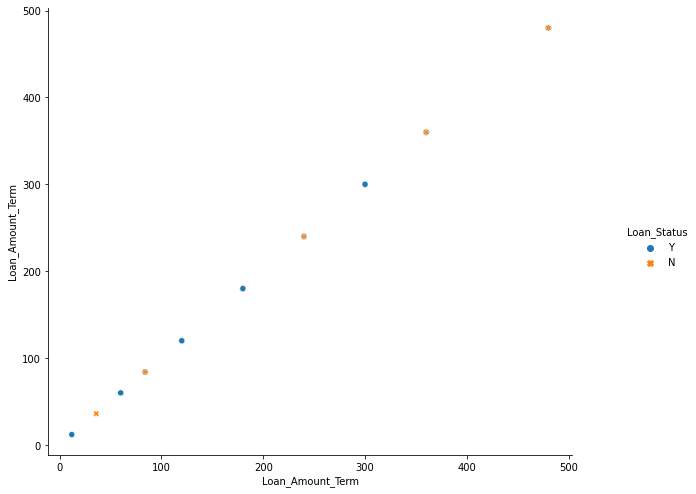

In [35]:
pl=sns.relplot(x='Loan_Amount_Term',y='Loan_Amount_Term',data=df,hue='Loan_Status',style='Loan_Status')
pl.fig.set_size_inches(10,7)
plt.show()

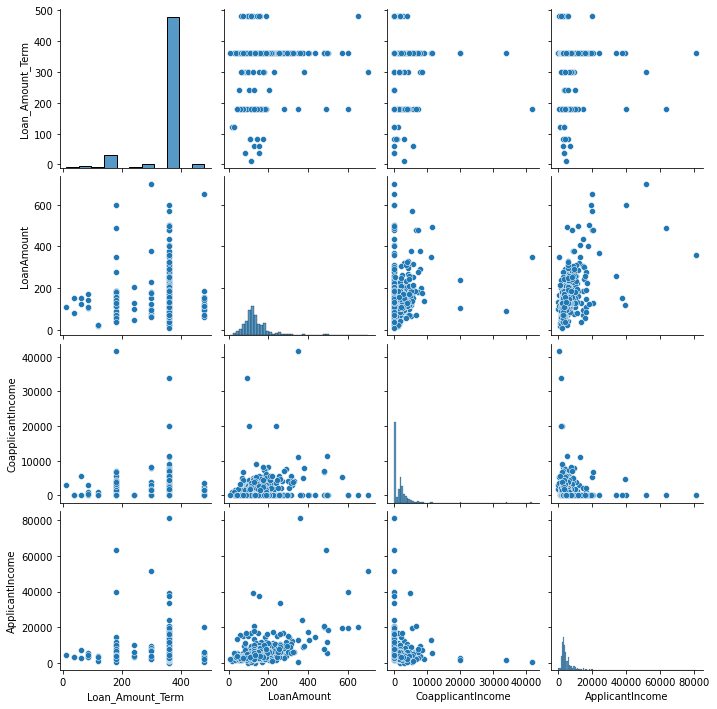

In [36]:
sns.pairplot(df[['Loan_Amount_Term','LoanAmount', 'CoapplicantIncome','ApplicantIncome']])

In [37]:
# label encode for categorical variables
label = LabelEncoder()

df['Credit_History'] = label.fit_transform(df['Credit_History'])
df['Education'] = label.fit_transform(df['Education'])
df['Property_Area'] = label.fit_transform(df['Property_Area'])
df['Self_Employed'] = label.fit_transform(df['Self_Employed'])
df['Dependents'] = label.fit_transform(df['Dependents'])
df['Married'] = label.fit_transform(df['Married'])
df['Gender'] = label.fit_transform(df['Gender'])
df['Loan_Status'] = label.fit_transform(df['Loan_Status'])

In [38]:
# check result after label encode
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


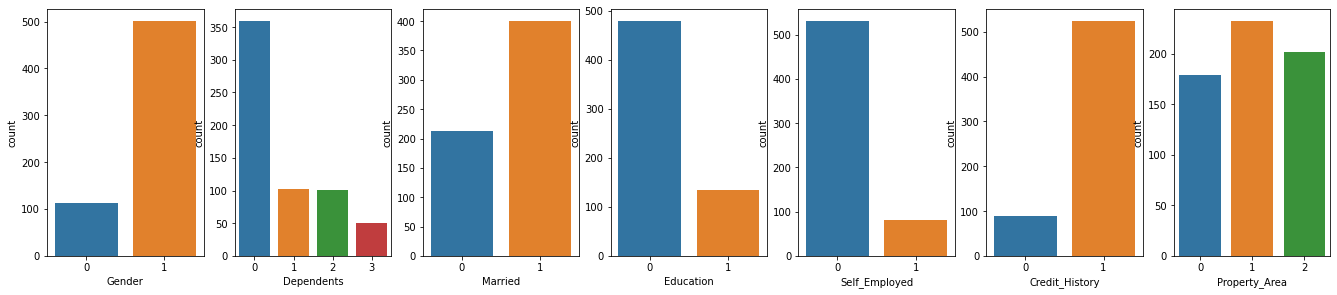

In [39]:
features=['Gender', 'Dependents',	'Married',	'Education',	'Self_Employed', 'Credit_History', 'Property_Area']

plt.figure(figsize=(23,10))
for i in enumerate(features):
  plt.subplot(2,7,i[0]+1)
  sns.countplot(df[i[1]])


### **Releationship Between Each Numerical Variable**

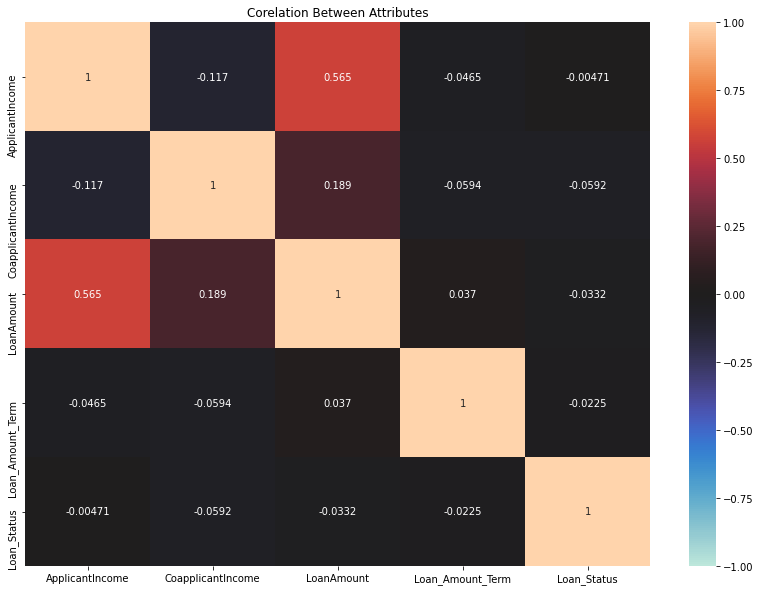

In [40]:
plt.subplots(figsize = (14,10))
sns.heatmap(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']].corr(),
            annot=True,fmt='.3g', vmin=-1, vmax=1, center= 0).set_title("Corelation Between Attributes")
plt.show()

### **Model Implementation**

In [41]:
# pre-processing
y = df['Loan_Status']
x = df.drop(['Loan_Status'],axis=1)

In [42]:
# define object for over sampling
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [43]:
# balance the dataset using over sampling method
x,y=over.fit_resample(x,y)

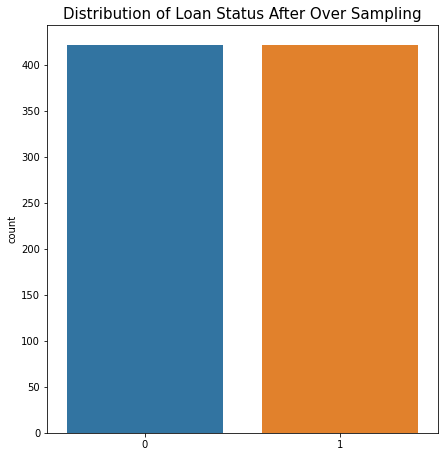

In [44]:
plt.figure(figsize=(7,7.5))
sns.countplot(y)
plt.title("Distribution of Loan Status After Over Sampling",size=15)
plt.show()

In [45]:
# scale the independent variable 
sc = StandardScaler()
x = sc.fit_transform(x)

In [72]:
# divide into training set & test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [73]:
#define functions for fit, & predict with each models
def models(mod,x_t,y_t,x_tes,y_tes,x_source,y_source):
    
    #Fit model
    mod.fit(x_t,y_t)
    
    #Predict Model
    pred = mod.predict(x_tes)
    
    #Accuracy Score
    accuracy = accuracy_score(y_tes,pred)

    #AUC_ROC Score
    AUC_ROC_Score = roc_auc_score(y_tes,pred)
    
    #Cross Validation Score
    cross_validation = cross_val_score(mod,x_source,y_source,cv=5)

    print("Accuracy Is : ",round(accuracy*100,4),"%")
    
    print("-------------------------------------------")   
    
    print('Cross validations mean score ',round(np.mean(cross_validation)*100,4),'%')
    
    print("-------------------------------------------")

    print('AUC_ROC Score ',round(np.mean(AUC_ROC_Score)*100,4),'%')

    print("-------------------------------------------")
    
    #Confusion Metrix
    print(confusion_matrix(y_tes, pred))
    
    print("-------------------------------------------")    
    
    #Recall Score , Percision Score, F1 Score
    print("Recall Score :",recall_score(y_tes, pred, average='weighted'))
    print("Percision Score :",precision_score(y_tes, pred, average='weighted'))
    print("F1 Score :",f1_score(y_tes, pred, average='weighted'))

### **LogisticRegression**

In [74]:
model = LogisticRegression()

models(model,x_train,y_train,x_test,y_test,x,y )

Accuracy Is :  71.5976 %
-------------------------------------------
Cross validations mean score  73.222 %
-------------------------------------------
AUC_ROC Score  73.3901 %
-------------------------------------------
[[54 40]
 [ 8 67]]
-------------------------------------------
Recall Score : 0.7159763313609467
Percision Score : 0.7623289027477242
F1 Score : 0.7118148124065284


### **Decision Tree Classifier**

In [75]:
model_1 = DecisionTreeClassifier(random_state=42)
models(model_1,x_train,y_train,x_test,y_test,x,y )

Accuracy Is :  79.2899 %
-------------------------------------------
Cross validations mean score  76.9019 %
-------------------------------------------
AUC_ROC Score  79.0922 %
-------------------------------------------
[[76 18]
 [17 58]]
-------------------------------------------
Recall Score : 0.7928994082840237
Percision Score : 0.7932192095049612
F1 Score : 0.7930314269351159


### **RandomForestClassifier**

In [76]:
model_2 = RandomForestClassifier(n_estimators=150,random_state=42)
models(model_2,x_train,y_train,x_test,y_test,x,y )

Accuracy Is :  83.432 %
-------------------------------------------
Cross validations mean score  84.9634 %
-------------------------------------------
AUC_ROC Score  84.2979 %
-------------------------------------------
[[72 22]
 [ 6 69]]
-------------------------------------------
Recall Score : 0.834319526627219
Percision Score : 0.8499252227062878
F1 Score : 0.8345980592246515


### **Extra Trees Classifier**

In [77]:
model_3 = ExtraTreesClassifier(random_state=42)
models(model_3,x_train,y_train,x_test,y_test,x,y )

Accuracy Is :  81.6568 %
-------------------------------------------
Cross validations mean score  82.121 %
-------------------------------------------
AUC_ROC Score  82.2979 %
-------------------------------------------
[[72 22]
 [ 9 66]]
-------------------------------------------
Recall Score : 0.8165680473372781
Percision Score : 0.8272518080210387
F1 Score : 0.8170696316425434


### **Support Vector Machine**

In [78]:
model_4 = svm.SVC()
models(model_4,x_train,y_train,x_test,y_test,x,y )

Accuracy Is :  75.1479 %
-------------------------------------------
Cross validations mean score  74.6464 %
-------------------------------------------
AUC_ROC Score  77.1206 %
-------------------------------------------
[[56 38]
 [ 4 71]]
-------------------------------------------
Recall Score : 0.7514792899408284
Percision Score : 0.8082044043935364
F1 Score : 0.747006338143462


### *Random Forest Classifier model gives higher score accuracy more than other models. Therefore Random Forest Classifier model consider as the model for further implementations & evaluations*

### **Hyper Parameter Tuning with Random Forest Classifer Model**

In [79]:
# define parameters & fit the model
parameters = {'n_estimators':[100, 200, 300, 400, 500],
            'criterion':['gini','entropty'],
            'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
           'max_features':['int','float','auto','log2'],'random_state':[42]}

best_model = RandomForestClassifier()

clf = GridSearchCV(best_model, parameters, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [80]:
# add model values to dataframe
df_grid = pd.DataFrame(clf.cv_results_)

# rank the datapoint by ranking
df_grid.sort_values(by=['rank_test_score']).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
218,0.662467,0.004536,0.037068,0.000715,gini,10,log2,400,42,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.807407,0.859259,0.866667,0.866667,0.844444,0.848889,0.022272,1
213,0.669530,0.012231,0.037044,0.000896,gini,10,auto,400,42,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.807407,0.859259,0.866667,0.866667,0.844444,0.848889,0.022272,1
219,0.831808,0.023180,0.065918,0.038943,gini,10,log2,500,42,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.807407,0.859259,0.851852,0.866667,0.851852,0.847407,0.020741,3


In [81]:
# best parameters
clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 400,
 'random_state': 42}

In [82]:
# highest score 
clf.best_score_

0.8488888888888889

In [83]:
# model estimater/parameters
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### **Test Model With Tuned Values** : *Decision Tree Classifier*

In [89]:
# test model with tuned values
Tuned_model = RandomForestClassifier(criterion='gini',max_depth=None, max_features='auto',n_estimators=500,random_state=42)


models(Tuned_model,x_train,y_train,x_test,y_test,x,y )

Accuracy Is :  84.6154 %
-------------------------------------------
Cross validations mean score  84.2526 %
-------------------------------------------
AUC_ROC Score  85.6312 %
-------------------------------------------
[[72 22]
 [ 4 71]]
-------------------------------------------
Recall Score : 0.8461538461538461
Percision Score : 0.8657437638761917
F1 Score : 0.8462508080155139


### *Only tuned with few values due to the lack of hardware performance. therefore after get tuned values test the accuracy with some "n_estimators"*

### **ROC-AOC Curve**

In [90]:
# calculate false positive rate & true posituve rate
fpred=pd.Series(Tuned_model.predict_proba(x_test)[:,1])
fpr,tpr,threshold=metrics.roc_curve(y_test,fpred)

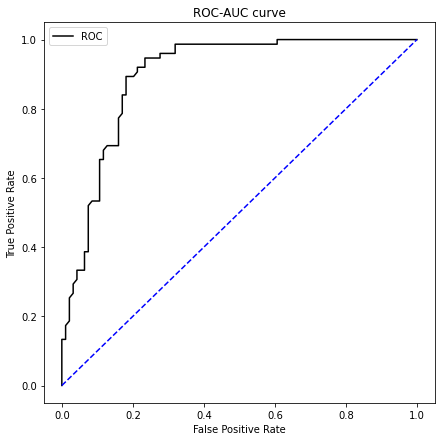

In [91]:
# visualize the ROC-AOC Curve
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,color='k',label='ROC')
plt.plot([0,1],[0,1],color='b',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()

### *After parameters tuned Random Forest Classifier Model gives higher accuracy , cross validation & ROC value. therefore we can get this model with tuned paramter values as our final model*

### **Test Final Model With Input Values**

In [92]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1


In [94]:
def classifer(input_data):

  input_array = np.asarray(input_data)
  arr_reshape = input_array.reshape(1,-1)

  scaled = sc.transform(arr_reshape)

  Loan_pred =  Tuned_model.predict(scaled)
  print(Loan_pred[0])


def main():

  Gender  = 'Male'                
  Martial_st = 'Maried'               
  Dependents = '1'            
  Education = 'Graduate'          
  Self_Employed = 'No'            
  Credit_History = 'Yes' 
  Property_Area = 'Urban'

  ApplicantIncome = 4583        
  CoapplicantIncome =  1508.0  
  LoanAmount = 128.0         
  Loan_Amount_Term =  360.0	


#change gender.........................................
  if Gender == 'Female':
      Gender = 0

  elif Gender == 'Male':
      Gender = 1

#change martial status..................................
  if Martial_st == 'Maried':
      Martial_st = 1

  elif Martial_st == 'Unmarried':
      Martial_st = 0

#change Dependents status..................................
  if Dependents == '0':
      Dependents = 0

  elif Dependents == '1':
      Dependents = 1

  elif Dependents == '2':
      Dependents = 2

  elif Dependents == '3+':
      Dependents = 3 

#change Education status..................................
  if Education == 'Graduate':
      Education = 0

  elif Education == 'Not Graduate':
      Education = 1

#change Self_Employed status..................................
  if Self_Employed == 'Yes':
      Self_Employed = 1

  elif Self_Employed == 'No':
      Self_Employed = 0

#change credit history status..................................
  if Credit_History == 'Yes':
      Credit_History = 1

  elif Credit_History == 'No':
      Credit_History = 0

#change Property Area status..................................
  if Property_Area == 'Urban':
      Property_Area = 0

  elif Property_Area == 'Rural':
      Property_Area = 1

  elif Property_Area == 'Semi Urban':
      Property_Area = 2

# add feature value to set          
  input_data = [Gender,	Martial_st, Dependents,	Education, Self_Employed, float(ApplicantIncome),	float(CoapplicantIncome), float(LoanAmount), float(Loan_Amount_Term), Credit_History, Property_Area]


# tranfer value to model function & pre proccessings
  classifer(input_data)



#call the main function
main()

0


### *Model predict value with 85% accuracy. Then now save the model & scaler as obejcts for deployments*

### **Save Scaler**

In [95]:
#save scaler as object
import pickle
scalerfile = 'scaler.save'
pickle.dump(sc, open(scalerfile, 'wb'))

### **Save Model**

In [96]:
#save model as obejct
with open('Loan_cls_model','wb') as f:
  pickle.dump(Tuned_model,f)

### **Save Notebook File as HTML**

In [97]:
%%shell
jupyter nbconvert --to html '/content/Loan_Status_Classifier.ipynb'

[NbConvertApp] Converting notebook /content/Loan_Status_Classifier.ipynb to html
[NbConvertApp] Writing 958062 bytes to /content/Loan_Status_Classifier.html
